In [1]:
import shutil
import numpy as np
import io
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
import seaborn as sns

2024-12-09 11:46:19.497080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 11:46:19.497116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 11:46:19.499114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 11:46:19.508097: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def get_model():
    global model2
    global model3
    model2 = load_model('./exported_models/NASNet_2class_mid')
    print("Model 2 loaded successfully!")
    model3 = load_model('./exported_models/NASNet_2class_low')
    print("Model 3 loaded successfully!")
get_model()

2024-12-09 11:46:32.323047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1926] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31124 MB memory:  -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0f:00.0, compute capability: 7.0


Model 2 loaded successfully!
Model 3 loaded successfully!


In [3]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 522 images belonging to 3 classes.
Found 522 images belonging to 3 classes.


In [ ]:
predictions1 = model1.predict(test_generator)
class_predictions1 = (predictions1 > 0.5).astype(int).flatten()

In [4]:
predictions2 = model2.predict(test_generator)
class_predictions2 = (predictions2 > 0.5).astype(int).flatten()

# True labels from test generator
true_labels = test_generator.classes

2024-12-09 11:50:16.487194: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:467] Loaded cuDNN version 90100


17/17 [==============================] - 10s 347ms/step


In [5]:
predictions3 = model3.predict(test_generator)
class_predictions3 = (predictions3 > 0.5).astype(int).flatten()

17/17 [==============================] - 18s 388ms/step


In [6]:
final_class_predictions = []
for i in range(len(predictions2)):
    if class_predictions2[i] == 0:
        final_class_predictions.append(2)
    elif class_predictions2[i] == 1:
        if class_predictions3[i] == 0:
            final_class_predictions.append(0)
        elif class_predictions3[i] == 1:
            final_class_predictions.append(1)

In [ ]:
print("Predictions for test data (Predicted, True Label):")
for i in range(len(true_labels)):
    print(f"{final_class_predictions[i]}, {true_labels[i]}")

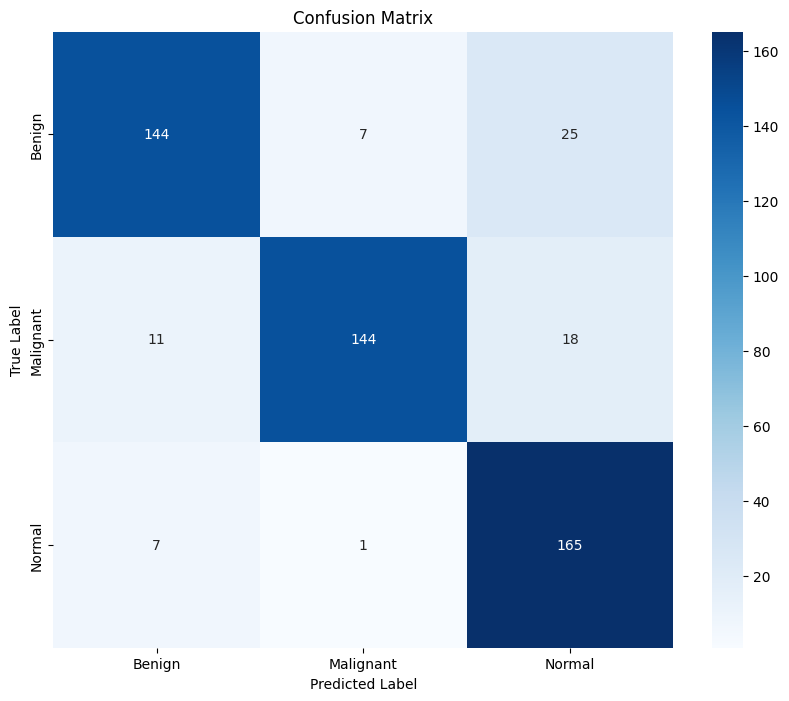

In [8]:
cm = confusion_matrix(true_labels, final_class_predictions)
classes = ['Benign', 'Malignant', 'Normal']

#Confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()